In [1]:
import pandas as pd
import numpy as np

### Data Generation

100 features of uniform(0,1)
1 feature 9800 rows guassian mean=0.5 std dev=0.25 200 rows mea=0.75, std dev=0.1

In [2]:
mat = np.random.uniform(0,1,size=(10000,100))

In [3]:
df = pd.DataFrame(mat,columns=["F"+str(i) for i in range(1,101)])

In [5]:
df.head().T

,0,1,2,3,4
F1,0.547482,0.764782,0.034805,0.156398,0.388417
F2,0.410291,0.596623,0.277644,0.474730,0.912078
F3,0.207457,0.932004,0.020566,0.307669,0.361461
F4,0.478265,0.569340,0.991130,0.724524,0.068520
F5,0.094138,0.451662,0.635203,0.897120,0.291570
...,...,...,...,...,...
F96,0.993426,0.981927,0.142756,0.757989,0.429445
F97,0.590698,0.308143,0.105747,0.929116,0.144576
F98,0.912846,0.105051,0.239126,0.706364,0.945463
F99,0.162815,0.445028,0.088733,0.862860,0.352880


In [180]:
arr = list(np.random.normal(0.5,0.1,9800))

In [181]:
temp3 = list(np.random.normal(0.75,0.1,200))

In [177]:
t = arr.extend(temp3)

In [178]:
df_t =  pd.DataFrame(mat,columns=["F"+str(i) for i in range(1,101)])

In [179]:
df_t["F101"] = t

In [182]:
df_t["F102"] = t

In [42]:
temp1 = list(np.random.normal(0.75,0.1,100))
temp2 = list(np.random.normal(0.55,0.1,100))
temp = temp1+temp2

In [43]:
arr.extend(temp)

In [46]:
df = df.drop(columns=["Y"])

#### Labels: 1-> Guassian with mean 0.5 and 0-> guassian with mean 0.75


In [47]:
labels = [1 for i in range(9800)]

In [48]:
labels.extend([0 for i in range(200)])

In [40]:
df["F101"] = arr

In [44]:
df["F102"] = arr

In [49]:
df["Y"] = labels

In [50]:
df.head().T

,4367,6412,3755,29,5332
F1,0.212991,0.775834,0.505361,0.202934,0.361915
F2,0.707411,0.414054,0.874391,0.097163,0.885557
F3,0.581004,0.216641,0.520624,0.706547,0.463493
F4,0.349465,0.973892,0.373691,0.150447,0.034259
F5,0.754578,0.452900,0.058003,0.153215,0.111184
...,...,...,...,...,...
F99,0.658147,0.564061,0.945214,0.747583,0.769170
F100,0.209693,0.426660,0.461382,0.661015,0.878378
F101,0.739820,0.566099,0.238810,0.338618,0.295997
F102,0.341047,0.699059,0.880801,0.380310,0.612539


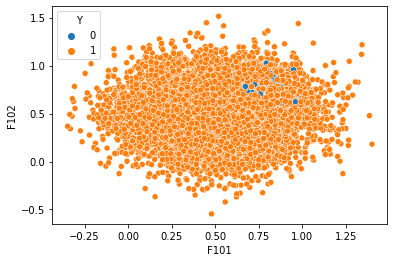

In [171]:
sns.scatterplot(x="F101",y="F102",data=df,hue='Y')

#### Random Sampling

In [151]:
df = df.sample(frac=1)

In [152]:
df_sample = df.iloc[:100,]

In [153]:
df_sample.shape

(100, 103)

In [154]:
df_sample.Y.value_counts()

1    98
0     2
Name: Y, dtype: int64

In [165]:
import seaborn as sns

In [169]:
df_sample.columns

Index(['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10',
       ...
       'F94', 'F95', 'F96', 'F97', 'F98', 'F99', 'F100', 'F101', 'F102', 'Y'],
      dtype='object', length=103)

#### Model Building Random Forest

In [155]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import f1_score as asc

In [156]:
model = RFC()

In [157]:
x_sample,y_sample = df_sample.drop(columns=["Y"]),df_sample.Y

In [158]:
x_sample.shape

(100, 102)

In [159]:
model.fit(x_sample,y_sample)

RandomForestClassifier()

In [160]:
test = df.iloc[100:,]

In [161]:
test_x,test_y = test.drop(columns=["Y"]),test.Y

In [162]:
Yhat_test1 = model.predict_proba(test_x)

In [163]:
Yhat_test1

array([[0.03, 0.97],
       [0.05, 0.95],
       [0.01, 0.99],
       ...,
       [0.05, 0.95],
       [0.01, 0.99],
       [0.02, 0.98]])

In [164]:
def less_confidence_pts(x,thres=0.7):
  '''Function to find 10 less confidence points
  args: x 2d matrix threshold: default 0.20
  return: list of indexes
  '''
  index = []
  for i in range(len(x)):
    index.append(abs(x[i][0]-x[i][1]))
  index = np.array(index)
  index = np.argsort(index)
  return index[:10]


In [141]:
less_confidence_pts(Yhat_test1)

[56, 80, 124, 167, 390, 555, 598, 935, 1407, 1411]

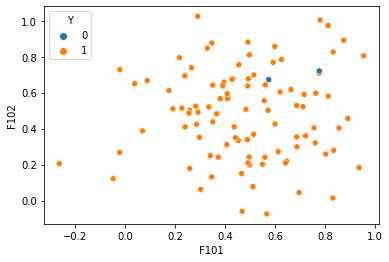

In [170]:
sns.scatterplot(x="F101",y="F102",data=df_sample,hue='Y')

In [172]:
t1 = []

In [174]:
for i in range(10):
  index = list(less_confidence_pts(Yhat_test1))
  t1.append(index)
  df_sample = pd.concat([df_sample,test.iloc[index,:]])
  x_sample,y_sample = df_sample.drop(columns=["Y"]),df_sample.Y
  model = RFC()
  model.fit(x_sample,y_sample)
  index.extend([i for i in range(100)])
  index = set(test.index) - set(index)
  test = df.iloc[list(index),:]
  test_x,test_y = test.drop(columns=["Y"]),test.Y
  Yhat_train = model.predict(x_sample)
  Yhat_test = model.predict(test_x)
  Yhat_test1 = model.predict_proba(test_x)
  print("Report of Iteration",i)
  print(df_sample.Y.value_counts())
  print("Train F1 Score:",asc(y_sample,Yhat_train))
  print("Test F1 Score:",asc(test_y,Yhat_test))
  print("-"*20)


Report of Iteration 0
1    118
0      2
Name: Y, dtype: int64
Train F1 Score: 1.0
Test F1 Score: 0.9899437883554227
--------------------
Report of Iteration 1
1    127
0      3
Name: Y, dtype: int64
Train F1 Score: 1.0
Test F1 Score: 0.9900432674764115
--------------------
Report of Iteration 2
1    135
0      5
Name: Y, dtype: int64
Train F1 Score: 1.0
Test F1 Score: 0.9899884076298873
--------------------
Report of Iteration 3
1    144
0      6
Name: Y, dtype: int64
Train F1 Score: 1.0
Test F1 Score: 0.9900452488687783
--------------------
Report of Iteration 4
1    153
0      7
Name: Y, dtype: int64
Train F1 Score: 1.0
Test F1 Score: 0.9901022054868209
--------------------
Report of Iteration 5
1    163
0      7
Name: Y, dtype: int64
Train F1 Score: 1.0
Test F1 Score: 0.9901065449010654
--------------------
Report of Iteration 6
1    172
0      8
Name: Y, dtype: int64
Train F1 Score: 1.0
Test F1 Score: 0.9902230034054708
--------------------
Report of Iteration 7
1    182
0      8
N